# Heat Equation

This notebook uses a C program to solve the heat equation
$$
\partial_t u = \kappa \partial_{xx} u
$$
and then visualizes the results

## Test and Visualize Results

#### Load various modules and set defaults

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['animation.html'] = 'html5'

#### Run the test

In [2]:
!git checkout ad4c5ae && cd build && make && mpirun -n 2 ./test_heat_eqn

M	class22/heat_eqn.ipynb
M	class22/heat_eqn_solve.cxx
Note: switching to 'ad4c5ae'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at ad4c5ae class22he: pass domain to calc_rhs()
Scanning dependencies of target test_heat_eqn
[ 25%] Building CXX object CMakeFiles/test_heat_eqn.dir/test_heat_eqn.cxx.o
[ 50%] Linking CXX executable test_heat_eqn
[ 50%] Built target test_heat_eqn
Scanning dependencies of target heat_eqn_solve
[ 75%] Building CXX object CMakeFiles/heat_eqn_solve.dir/heat_eqn_solve.cxx.o
[100%] Linking

#### Plot the test results

The automated test indicates that things are wrong. If we plot, below, the output from rank 0, and rank 1, we can see that the values at the boundaries don't match (they're so far off that they're not within the range of the plot). That shouldn't be surprising, since we didn't set the ghost points right.

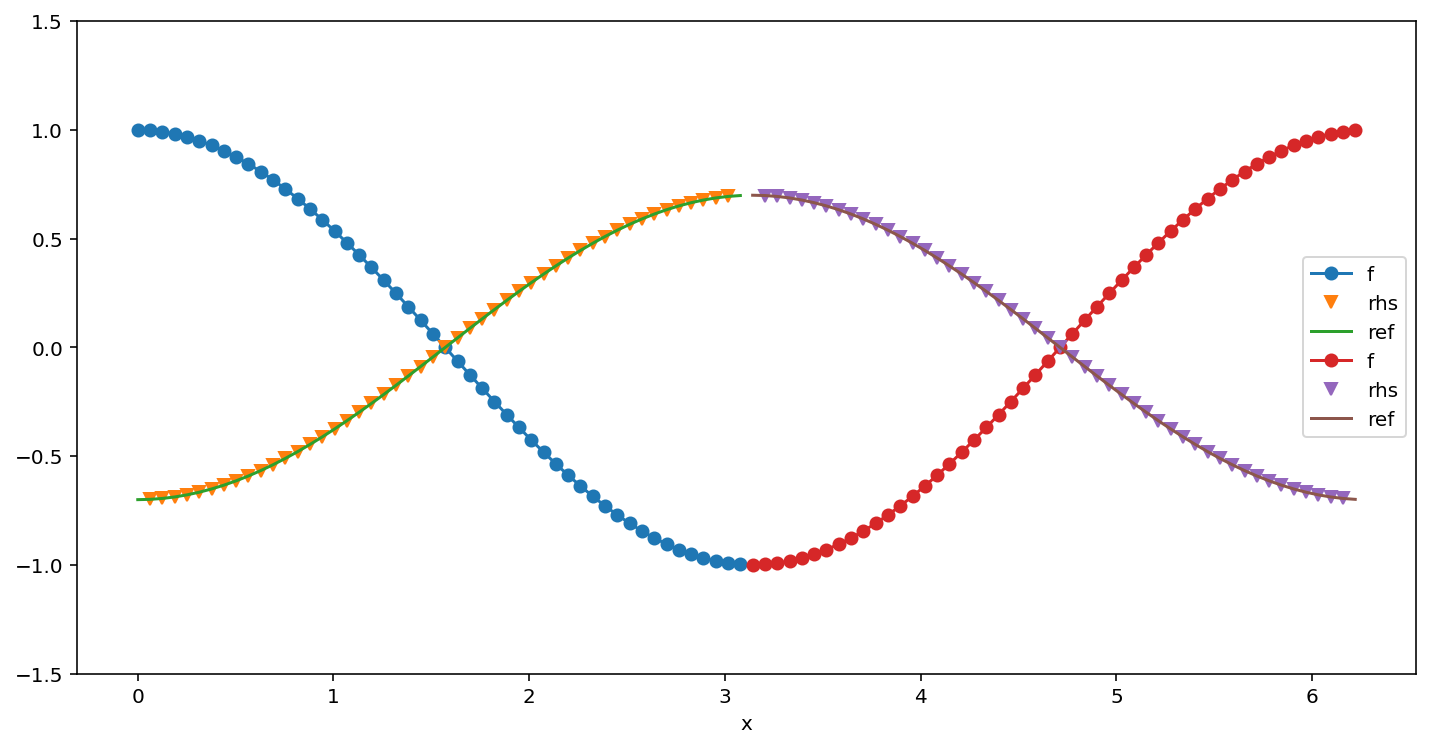

In [3]:
ax = plt.subplot(1, 1, 1)
for rank in range(2):
    df = pd.read_csv("build/f-{}.csv".format(rank), names=("x", "f", "rhs", "ref"))
    df.plot(x="x", y="f", label="f", style='-o', ax=ax)
    df.plot(x="x", y="rhs", label="rhs", style='v', ylim=(-1.5, 1.5), ax=ax)
    df.plot(x="x", y="ref", label="ref", style='-', ax=ax);

#### Plot the test results again

This is after using`fill_ghosts()` in test_heat_eqn. Running it again gives no more test failure, and the results look good, too.

In [4]:
!git checkout master && cd build && make && mpirun -n 2 ./test_heat_eqn

M	class22/heat_eqn.ipynb
M	class22/heat_eqn_solve.cxx
Previous HEAD position was ad4c5ae class22he: pass domain to calc_rhs()
Switched to branch 'master'
Your branch is ahead of 'origin/master' by 6 commits.
  (use "git push" to publish your local commits)
Scanning dependencies of target test_heat_eqn
[ 25%] Building CXX object CMakeFiles/test_heat_eqn.dir/test_heat_eqn.cxx.o
[ 50%] Linking CXX executable test_heat_eqn
[ 50%] Built target test_heat_eqn
Scanning dependencies of target heat_eqn_solve
[ 75%] Building CXX object CMakeFiles/heat_eqn_solve.dir/heat_eqn_solve.cxx.o
[100%] Linking CXX executable heat_eqn_solve
[100%] Built target heat_eqn_solve


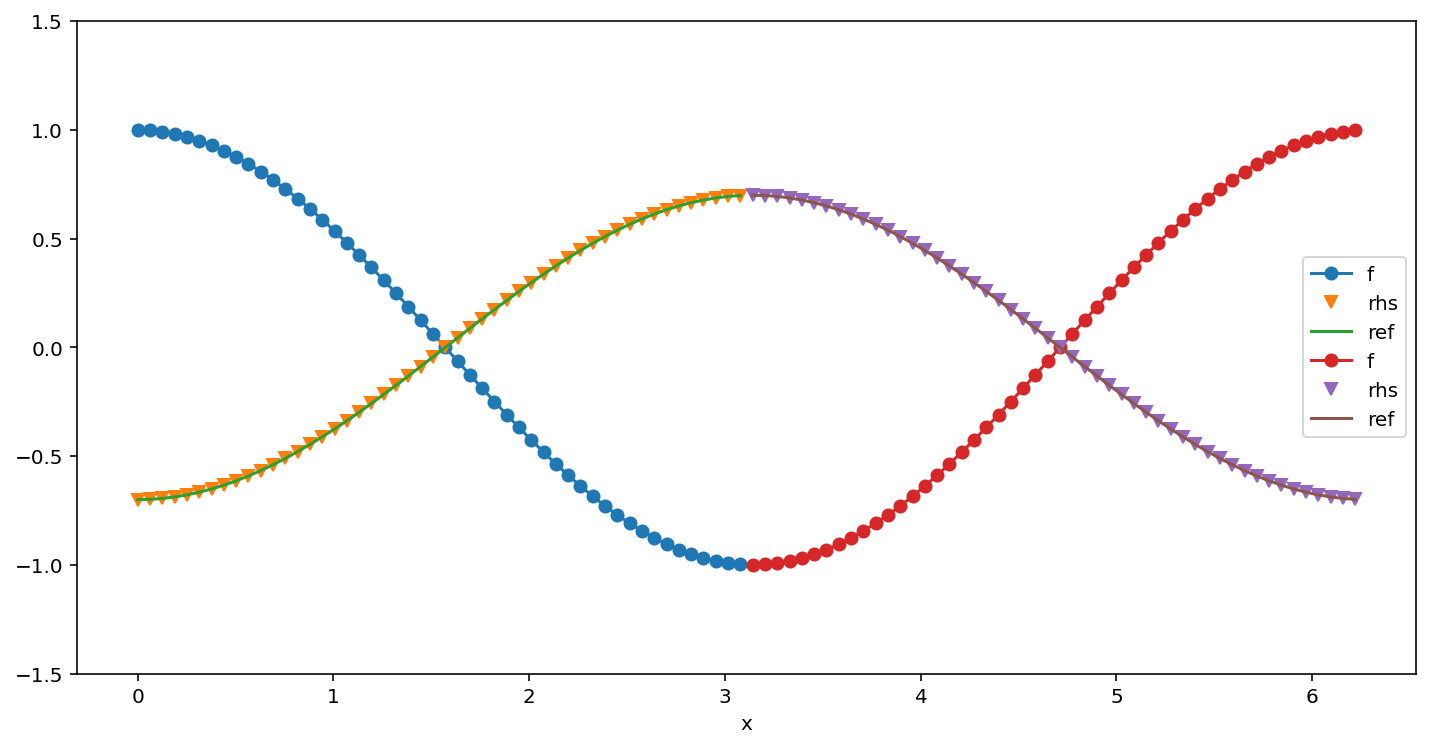

In [5]:
ax = plt.subplot(1, 1, 1)
for rank in range(2):
    df = pd.read_csv("build/f-{}.csv".format(rank), names=("x", "f", "rhs", "ref"))
    df.plot(x="x", y="f", label="f", style='-o', ax=ax)
    df.plot(x="x", y="rhs", label="rhs", style='v', ylim=(-1.5, 1.5), ax=ax)
    df.plot(x="x", y="ref", label="ref", style='-', ax=ax);

#### Run the heat equation solver

In [6]:
!cd build && mpirun -n 2 ./heat_eqn_solve

#### Plot the initial condition

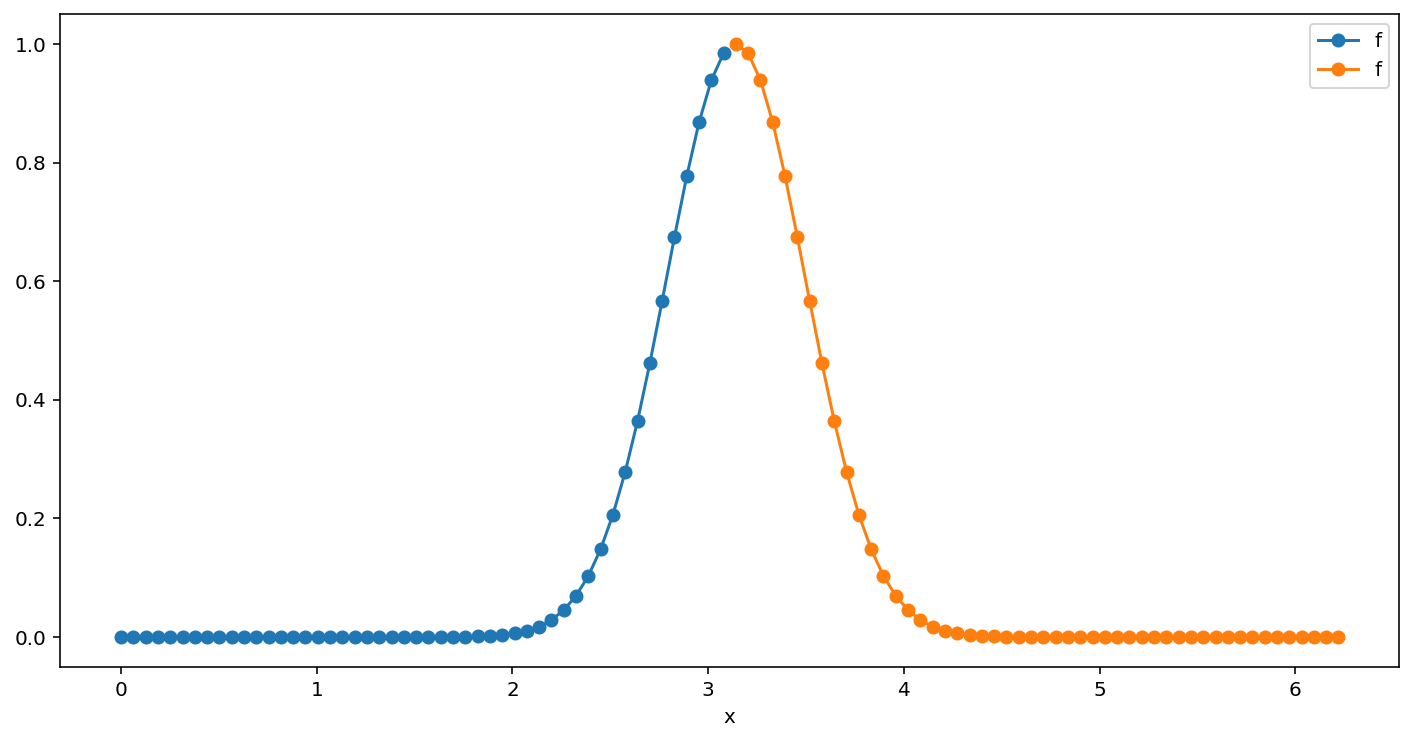

In [7]:
ax = plt.subplot(1, 1, 1)
for rank in range(2):
    df = pd.read_csv("build/f0-{}.csv".format(rank), names=("x", "f"))
    df.plot(x="x", y="f", style="o-", ax=ax);

In [8]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, 1)

lines = []
for rank in range(2):
    line, = ax.plot([], [], lw=2)
    lines.append(line)
plt.close()

In [9]:
def init():
    #line.set_data([], [])
    return (line,)

def animate(i):
    for rank in range(2):
        df = pd.read_csv("build/f{}-{}.csv".format(i*10, rank), names=("x", "f"))
        lines[rank].set_data(df["x"], df["f"])
    return (line,)

#### Show an animation of the time evolution of the solution

In [10]:
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=20, interval=200, blit=True)